# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

# Цель проекта

<div style="border:solid green 2px; padding: 20px">
Изучить, как параметры квартиры влияют на ее стоимость, чтобы научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
</div>

### Откройте файл с данными и изучите общую информацию. 

Выведем первые 20 строк датафрейма:

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Считаем датафрейм
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
# зададим в конфигурации, чтобы выводились все столбцы датафрейма без урезания 
pd.set_option('display.max_columns', None)

In [3]:
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заметим, что в датасете много столбцов с пропусками, далее будем их обрабатывать

Построим общую гистограмму для всех числовых столбцов таблицы для того, чтобы посмотреть на изначальное распределения данных в числовых столбцах:

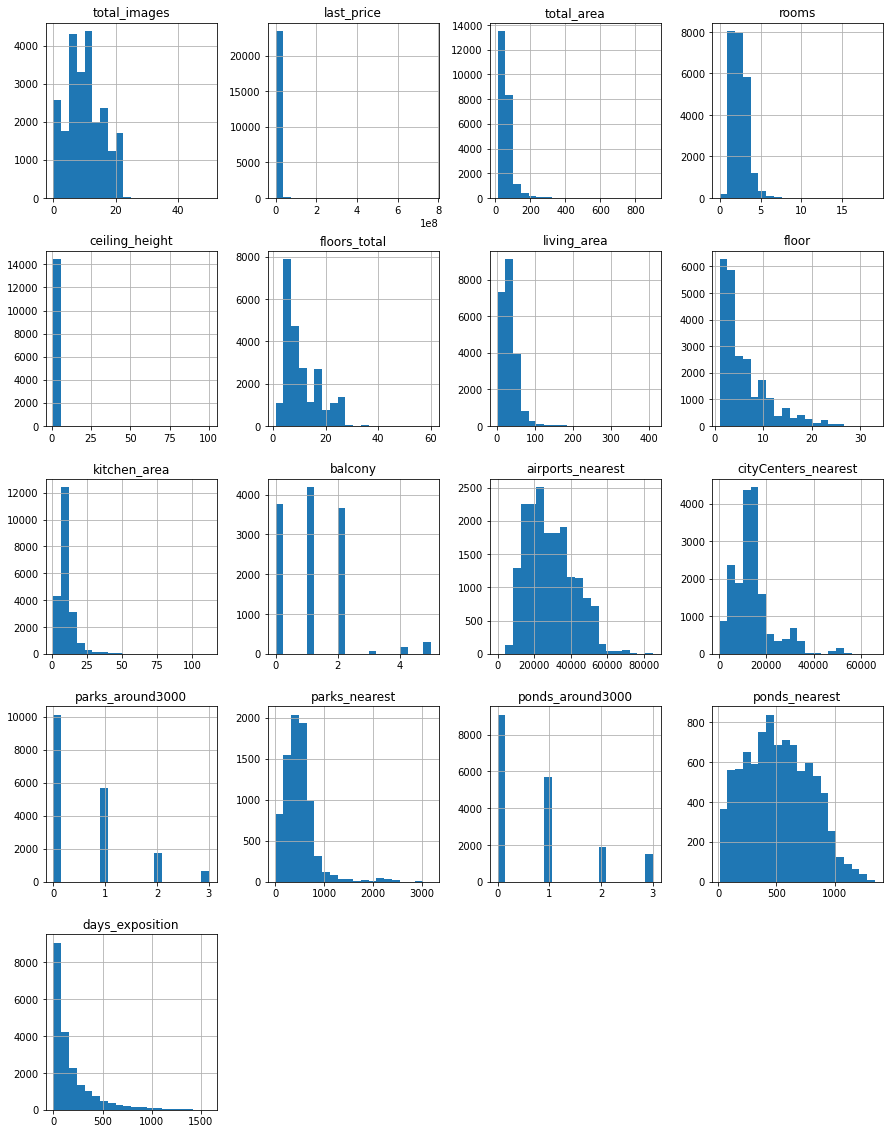

In [5]:
data.hist(figsize=(15, 20), bins=20);

**Выводы**

В каждой строке таблицы — данные из объявлений о продаже квартир. Часть колонок заполнены пользователями, а остальные — получены автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

В датафрейме 17 числовых полей, так что простор для анализа влияния параметров на стоимость квартиры большой. Больше половины из них содержат пропуски, так что нужно их обработать.

В целом по общей гистаграмме кажется, что данные заполнены адекватно и их можно будет оставить для анализа, предварительно кажется, что в датасете достаточно данных для этого.

Далее нужно устранить проблемы в данных.

### Предобработка данных

#### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посчитаем медианное значение в столбце с высотой потолка:

In [7]:
median_ceiling_height = data['ceiling_height'].median()
median_ceiling_height

2.65

Медианное значение похоже на стандартную высоту потолка, заменим пропуски в столбце с высотой потолков медианным значением:

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)
# проверим, что пропусков в столбце больше не осталось после заполнения
data['ceiling_height'].isna().sum()

0

Выведем несколько строк с пропусками в floors_total, чтобы проверить, не будет ли floor всегда заполнен 1 в таких домах и то есть дома одноэтажные:

In [9]:
display(data[data['floors_total'].isna()].head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.65,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Заметим, что данные с пропусками в floors_total содержат информацию в floor на разных этажах, поэтому у нас нет данных, чем заполнить пропуски в floors_total, оставим их. Информацию об этих квартирах мог добавлять риелтор и не знать общее количество этажей в доме.

Если в объявлении не указано число балконов, то скорее всего их нет, поэтому заменим такие пропуски на 0.

In [10]:
data['balcony'] = data['balcony'].fillna(0)
# проверим, что пропусков в столбце больше не осталось после заполнения
data['balcony'].isna().sum()

0

Если в объявлении не указано, является ли квартира апартаментами, то скорее всего не является, поэтому заменим такие пропуски на False.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna('False')
# проверим, что пропусков в столбце больше не осталось после заполнения
data['is_apartment'].isna().sum()

0

Неясно, чем заполнять пропуски в столбцах с жилой площадью, площадью кухни, названием города, картографическими данными и значениями, сколько дней было выставлено объявление, поэтому оставим пропуски в этих столбцах.

#### Преобразование типов

Обратим внимание на типы столбцов, преобразуем значения в более подходящие типы для них.
Заметим, что тип столбца floors_total - float, хотя число этажей всегда целое, преобразуем тип к int. Аналогично parks_around3000 содержит данные о числе парков в радиусе 3 км, ponds_around3000 - число водоемов в радиусе 3 км, days_exposition - сколько дней было размещено объявление, balcony - число балконов, все эти значения могут быть только целыми, преобразуем их к int.

In [12]:
data['floors_total'] = data['floors_total'].astype('int', errors='ignore')
data['parks_around3000'] = data['parks_around3000'].astype('int', errors='ignore')
data['ponds_around3000'] = data['ponds_around3000'].astype('int', errors='ignore')
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')
data['balcony'] = data['balcony'].astype('int', errors='ignore')
data[['floors_total', 'parks_around3000', 'ponds_around3000', 'days_exposition', 'balcony']].dtypes

floors_total        float64
parks_around3000    float64
ponds_around3000    float64
days_exposition     float64
balcony               int64
dtype: object

Так как столбцы floors_total, parks_around3000, ponds_around3000, days_exposition содержат пропуски, непонятно, чем их заполнить, поэтому не удалось привести их к int. Столбец balcony привели к типу int.

Заметим, что тип столбца first_day_exposition - object, хотя содержит в себе дату, преобразуем тип к datetime. 

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверим, что удалось преобразовать тип к datetime
data[['first_day_exposition']].dtypes

first_day_exposition    datetime64[ns]
dtype: object

Заметим, что тип столбца is_apartment - object, хотя содержит в себе логическое значение, преобразуем тип к bool. 

In [14]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data[['is_apartment']].dtypes

is_apartment    bool
dtype: object

Преобразованы типы в столбце 'balcony' на int, 'first_day_exposition' на datetime, 'is_apartment' на bool. Проверим данные после преобразования типов

In [15]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Устранение неявных дубликатов

После изменения типов в датасете остался только один строковый столбец - locality_name, выведем уникальные значения в нем, чтобы найти неявные дубликаты в нем, и число уникальных значений:

In [16]:
unique_localcity_names = data['locality_name'].unique()
print('Исходное число уникальных значений в столбце locality_name:', len(unique_localcity_names))
unique_localcity_names

Исходное число уникальных значений в столбце locality_name: 365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Заменим везде букву 'ё' на 'е', после этого посчитаем и выведем уникальные значения в столбце locality_name.

In [17]:
data['locality_name'] = data['locality_name'].str.replace('ё','е') 
unique_localcity_names = data['locality_name'].unique()
print('Число уникальных значений в столбце locality_name:', len(unique_localcity_names))
unique_localcity_names

Число уникальных значений в столбце locality_name: 331


array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Для избавления от неявных дубликатов заменим 'поселок городского типа', 'городской поселок', 'коттеджный поселок' на 'поселок',
'поселок при железнодорожной станции' заменим на 'поселок станции'

In [18]:
data['locality_name'] = data['locality_name']\
.str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name']\
.str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name']\
.str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name']\
.str.replace('поселок при железнодорожной станции', 'поселок станции') 
unique_localcity_names = data['locality_name'].unique()
print('Число уникальных значений в locality_name после удаления неявных дубликатов:',
      len(unique_localcity_names))
unique_localcity_names

Число уникальных значений в locality_name после удаления неявных дубликатов: 320


array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

После удаления неявных дубликатов число уникальных значений в столбце сократилось с 365 до 320

#### Обработка и устранение аномалий

Поищем редкие и выбивающиеся значения в числовых столбцах. Выведем типы столбцов датафрейма.

In [19]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Начнем со столбца 'ceiling_height', построим гистаграмму, диаграмму размаха для него и выведем описание данных для него

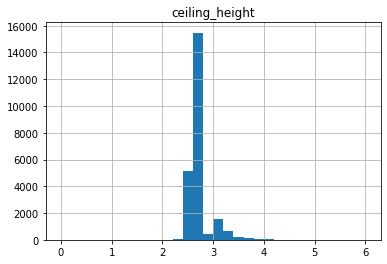

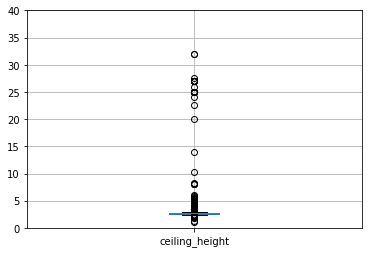

,ceiling_height
count,23699.000000
mean,2.724358
std,0.988298
min,1.000000
25%,2.600000
50%,2.650000
75%,2.700000
max,100.000000


In [20]:
data.hist('ceiling_height', range=(0, 6), bins=30)
plt.show() 
data.loc[:,['ceiling_height']].boxplot()
plt.ylim(0, 40)
plt.show() 

data.loc[:,['ceiling_height']].describe()

По диаграмме размаха заметим, что усы диаграммы заканчиваются значением 6,5, большинство значений сгруппированы около медианы 2.65 м. Логически понимаем, что вряд ли возвожны квартиры с мысотой потолков выше 6,5 м. Посчитаем, сколько квартир содержит значение выше 6,5 м или ниже 2 м в этом столбце.

In [21]:
data[(data['ceiling_height'] > 6.5) | (data['ceiling_height'] < 2)]['ceiling_height'].count()

32

Получилось всего 32 выброса, заменим их на медианное значение

In [22]:
data.loc[(data['ceiling_height'] > 6.5) | (data['ceiling_height'] < 2),'ceiling_height'] = median_ceiling_height
# проверим, что выбросов не осталось
data[(data['ceiling_height'] > 6.5) | (data['ceiling_height'] < 2)]['ceiling_height'].count()

0

Для столбца 'rooms' построим гистаграмму, диаграмму размаха и выведем описание данных

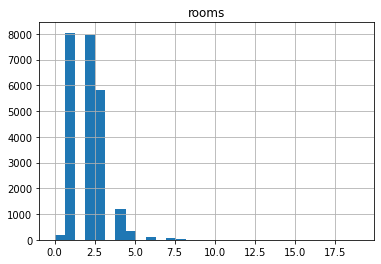

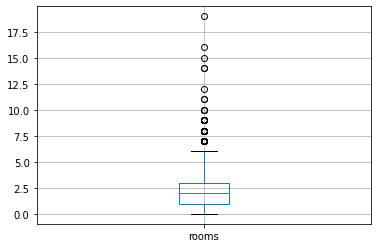

,rooms
count,23699.000000
mean,2.070636
std,1.078405
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


In [23]:
data.hist('rooms', bins=30)
plt.show() 
data.loc[:,['rooms']].boxplot()
plt.show() 
data.loc[:,['rooms']].describe()

По диаграмме размаха заметим, что усы диаграммы заканчиваются значением 6,5, большинство значений сгруппированы значениями от 1 до 3 комнат. Посчитаем, сколько квартир содержит данные о больше, чем 7 комнатах (значения, не представленные на гистограмме), и посмотрим первые несколько строк

In [24]:
print(data[data['rooms'] > 7]['rooms'].count())
display(data[data['rooms'] > 7].head(10))

31


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,True,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
813,7,16500000.0,229.0,2016-02-25,8,2.65,6.0,160.0,5,True,False,False,25.0,0,Санкт-Петербург,23968.0,4536.0,1.0,243.0,0.0,NaN,806.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,True,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,True,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
4435,13,22190000.0,191.2,2017-12-05,8,2.90,6.0,115.8,1,True,False,False,5.0,0,Санкт-Петербург,21589.0,1152.0,1.0,587.0,2.0,155.0,115.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,True,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
7857,11,150000000.0,230.0,2017-10-25,8,2.65,8.0,220.0,8,True,False,False,NaN,0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,135.0
8758,5,16100000.0,150.0,2018-07-10,8,2.92,5.0,107.0,1,True,False,False,7.2,0,Санкт-Петербург,26080.0,4782.0,2.0,473.0,0.0,NaN,NaN
8822,14,49968900.0,398.0,2017-07-12,9,3.00,2.0,160.1,1,False,False,False,41.0,0,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,471.0
8860,12,17000000.0,235.0,2018-07-14,9,3.00,6.0,NaN,3,True,False,False,NaN,0,Санкт-Петербург,24466.0,5034.0,1.0,346.0,0.0,NaN,90.0


Есть 31 квартира с редким количеством комнат, которые превышают 7, они могут значительно смещать дальнейший анализ зависимостей, так как у них также очень высокие цены, очень большая площадь и т.д. Так как таких значений мало, удалим эти данные из датафрейма

In [25]:
data = data.drop(data[data['rooms'] > 7].index)
# проверим, что не удалили слишком много данных
print(data[data['rooms'] > 7]['rooms'].count())
len(data)

0


23668

Для столбца 'last_price' построим гистаграмму, диаграмму размаха и выведем описание данных

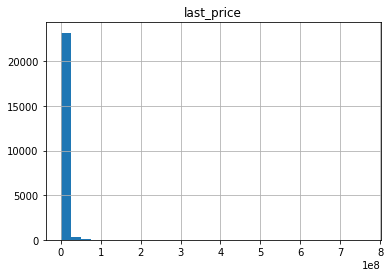

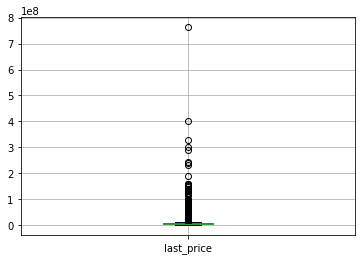

,last_price
count,"23,668.0"
mean,"6,482,332.5"
std,"10,405,783.0"
min,"12,190.0"
25%,"3,400,000.0"
50%,"4,640,000.0"
75%,"6,755,720.5"
max,"763,000,000.0"


In [26]:
data.hist('last_price', bins=30)
plt.show() 
data.loc[:,['last_price']].boxplot()
plt.show() 

# избавимся от экспоненты в отображении описания данных
pd.options.display.float_format = '{:,.1f}'.format

data.loc[:,['last_price']].describe()

По диаграмме размаха заметим, что усы диаграммы заканчиваются значением 180 млн руб, большинство значений сгруппированы значениями от 3,4 млн руб до 6,8 млн руб. Посчитаем, сколько квартир содержит данные о цене больше, чем 180 млн руб (значения, не представленные на гистограмме), и посмотрим первые несколько строк

In [27]:
print(data[data['last_price'] > 1.8e+08]['last_price'].count())
display(data[data['last_price'] > 1.8e+08].head(10))

9


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,"330,000,000.0",190.0,2018-04-04,3,3.5,7.0,95.0,5,True,False,False,40.0,0,Санкт-Петербург,"23,011.0","1,197.0",3.0,519.0,3.0,285.0,233.0
5893,3,"230,000,000.0",500.0,2017-05-31,6,2.6,7.0,NaN,7,True,False,False,40.0,0,Санкт-Петербург,"32,440.0","5,297.0",0.0,NaN,2.0,198.0,50.0
8900,13,"190,870,000.0",268.0,2016-03-25,3,2.6,8.0,132.0,7,True,False,False,40.0,0,Санкт-Петербург,"32,440.0","5,297.0",0.0,NaN,2.0,198.0,901.0
12971,19,"763,000,000.0",400.0,2017-09-30,7,2.6,10.0,250.0,10,True,False,False,NaN,2,Санкт-Петербург,"25,108.0","3,956.0",1.0,530.0,3.0,756.0,33.0
13749,7,"240,000,000.0",410.0,2017-04-01,6,3.4,7.0,218.0,7,True,False,False,40.0,0,Санкт-Петербург,"32,440.0","5,297.0",0.0,NaN,2.0,198.0,199.0
14706,15,"401,300,000.0",401.0,2016-02-20,5,2.6,9.0,204.0,9,False,False,False,24.0,3,Санкт-Петербург,"21,912.0","2,389.0",1.0,545.0,1.0,478.0,393.0
15651,20,"300,000,000.0",618.0,2017-12-18,7,3.4,7.0,258.0,5,True,False,False,70.0,0,Санкт-Петербург,"32,440.0","5,297.0",0.0,NaN,2.0,198.0,111.0
16461,17,"245,000,000.0",285.7,2017-04-10,6,3.4,7.0,182.8,4,True,False,False,29.8,0,Санкт-Петербург,"33,143.0","6,235.0",3.0,400.0,3.0,140.0,249.0
22831,18,"289,238,400.0",187.5,2019-03-19,2,3.4,6.0,63.7,6,True,False,False,30.2,0,Санкт-Петербург,"22,494.0","1,073.0",3.0,386.0,3.0,188.0,NaN


Нашлось 9 квартир с очень высокой ценой, превышающей 180 млн руб, они могут значительно смещать дальнейший анализ зависимостей. Так как таких значений мало, удалим эти данные из датафрейма

In [28]:
data = data.drop(data[data['last_price'] > 1.8e+08].index)
# проверим, что не удалили слишком много данных
print(data[data['last_price'] > 1.8e+08]['last_price'].count())
len(data)

0


23659

Обратим внимание, что стоимость самой дешевой квартиры - 12190 рублей, что не соответствует действительности. Посмотрев объявления на сайтах недвижимости в Ленинградской области, понимаем, что в продаже нет квартир стоимостью меньше 400 тыс руб. Посчитаем, сколько таких квартир.

In [29]:
print(data[data['last_price'] < 400000]['last_price'].count())
display(data[data['last_price'] < 400000].head(10))

1


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,"12,190.0",109.0,2019-03-20,2,2.8,25.0,32.0,25,True,False,False,40.5,0,Санкт-Петербург,"36,421.0","9,176.0",1.0,805.0,0.0,NaN,8.0


Нашлась 1 квартира с очень низкой ценой ниже 400 тыс руб, они могут значительно смещать дальнейший анализ зависимостей. Удалим ее из датафрейма

In [30]:
data = data.drop(data[data['last_price'] < 400000].index)
# проверим, что не удалили слишком много данных
print(data[data['last_price'] < 400000]['last_price'].count())
len(data)

0


23658

Для столбца 'total_area' построим гистаграмму, диаграмму размаха и выведем описание данных

Для столбца 'total_area' построим гистаграмму, диаграмму размаха и выведем описание данных

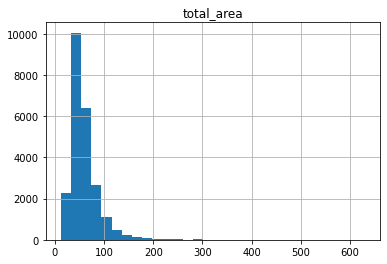

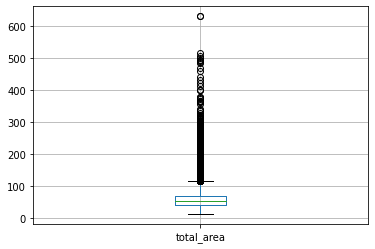

,total_area
count,"23,658.0"
mean,59.9
std,33.6
min,12.0
25%,40.0
50%,52.0
75%,69.6
max,631.2


In [31]:
data.hist('total_area', bins=30)
plt.show()
data.loc[:,['total_area']].boxplot()
plt.show() 
data.loc[:,['total_area']].describe()

Найдем и удалим квартиры с площадью более 530 кв.м как очень редкие

In [32]:
print('Число выбросов по total_area:', data[data['total_area'] > 530]['total_area'].count())
data = data.drop(data[data['total_area'] > 530].index)
# проверим, что не удалили слишком много данных
print('Оставшееся число квартир:', len(data))

Число выбросов по total_area: 2
Оставшееся число квартир: 23656


Для столбца 'living_area' построим гистаграмму, диаграмму размаха

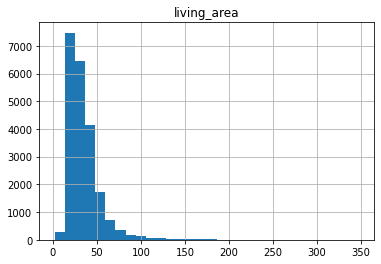

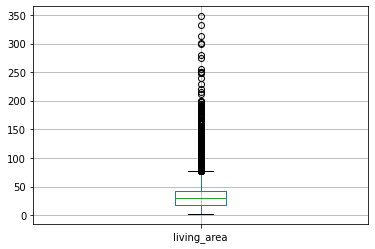

In [33]:
data.hist('living_area', bins=30)
plt.show()
data.loc[:,['living_area']].boxplot()
plt.show() 

Данные жилой площади до 350 кв.м. соотносятся с ограничениями в столбце total_area (530 кв.м)

Для столбца 'kitchen_area' построим гистаграмму, диаграмму размаха

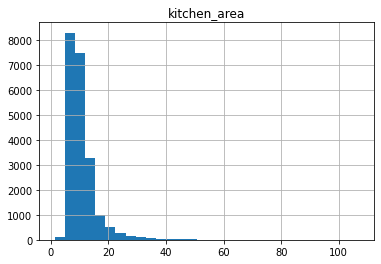

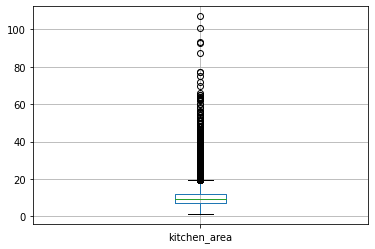

In [34]:
data.hist('kitchen_area', bins=30)
plt.show()
data.loc[:,['kitchen_area']].boxplot()
plt.show() 

Данные площади кухни до 110 кв.м. соотносятся с ограничениями в столбце total_area (530 кв.м)

Для столбца 'floor' построим гистаграмму, диаграмму размаха

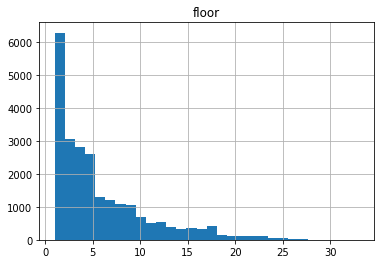

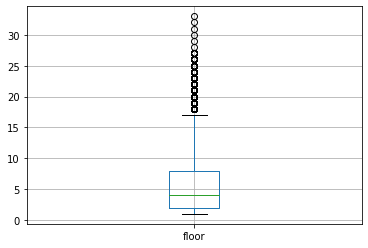

In [35]:
data.hist('floor', bins=30)
plt.show()
data.loc[:,['floor']].boxplot()
plt.show() 

Данные этажа до 35 соответствуют здравому смыслу

Для столбца 'first_day_exposition' построим гистаграмму

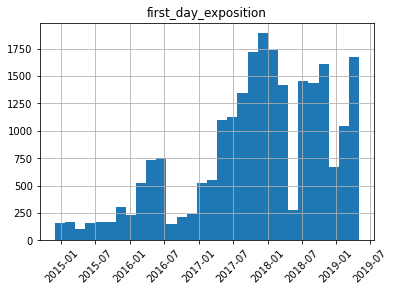

In [36]:
data.hist('first_day_exposition', bins=30, xrot=45);

Данные дат размещения объявления соответствуют здравому смыслу

Для столбца 'days_exposition' построим гистаграмму, диаграмму размаха

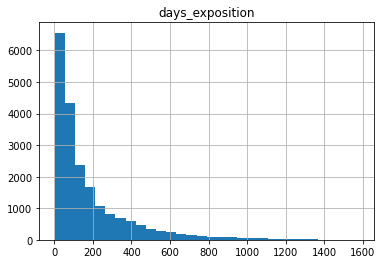

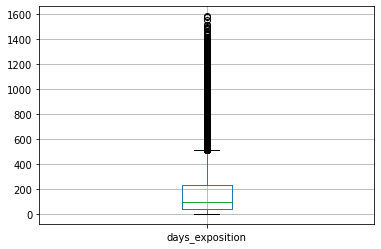

In [37]:
data.hist('days_exposition', bins=30)
plt.show()
data.loc[:,['days_exposition']].boxplot()
plt.show() 

Данные продолжительности размещения объявления (до 4,4 лет) соответствуют здравому смыслу

Картографические даннные далее не будут участвовать в исследованиях зависимости стоимости квартиры от разных показателей, поэтому их не будем проверять на наличие аномалий или редких значений.

<div style="border:solid green 2px; padding: 20px">
Заполнены медианным значением пропуски высоты пололка в столбце 'ceiling_height', заполнены нулями пропуске числа балконов в 'balcony', заполнены False пропуски, является ли квартира апартаментами в 'is_apartment'

Преобразованы типы в столбце 'balcony' на int, 'first_day_exposition' на datetime, 'is_apartment' на bool.

Удалены неявные дубликаты в столбце 'locality_name', после удаления неявных дубликатов число уникальных значений в столбце сократилось с 365 до 320.

Заменены аномалии в столбцах 'ceiling_height' медианным значением, удалены аномалии в столбцах 'rooms', 'last_price', 'total_area'.
</div>

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы:

In [38]:
# цена одного квадратного метра
data['price_per_meter2'] = data['last_price'] / data['total_area']
# день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
# месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
# год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year
# расстояние до центра города в киломентрах
data['cityCenters_distance_km'] = round(data['cityCenters_nearest'] / 1000, 0)

In [39]:
# функция вычисляет тип этажа квартиры
def categorize_floor_type(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [40]:
data['floor_type'] = data.apply(
    lambda x: categorize_floor_type(x['floor'], x['floors_total']), axis=1)

In [41]:
# проверим данные после добавления столбцов
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter2,weekday_exposition,month_exposition,year_exposition,cityCenters_distance_km,floor_type
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN,"120,370.4",3,3,2019,16.0,другой
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,True,False,False,11.0,2,поселок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0,"82,920.8",1,12,2018,19.0,первый
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,"92,785.7",3,8,2015,14.0,другой
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,NaN,9,True,False,False,NaN,0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,"408,176.1",4,7,2015,7.0,другой
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0,"100,000.0",1,6,2018,8.0,другой


Добавлены новые столбцы с параметрами: 
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

Построим отдельные гистограммы для параметров объектов и описание данных

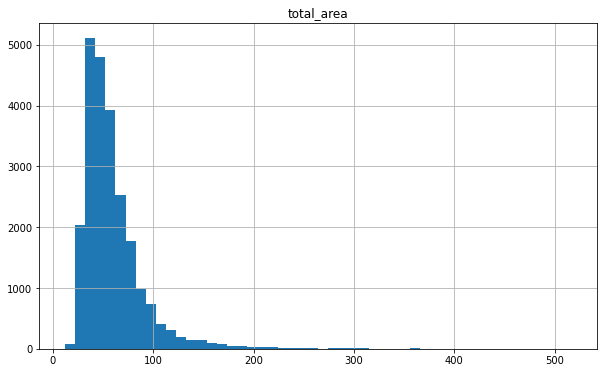

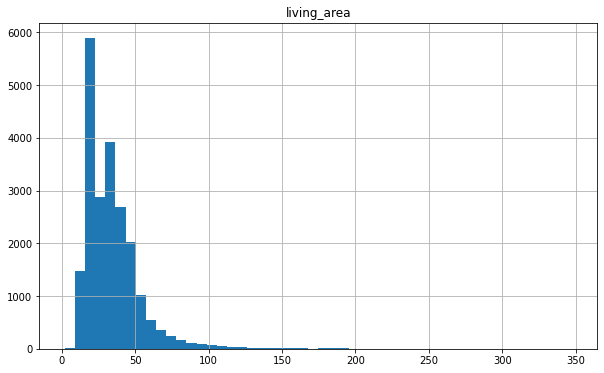

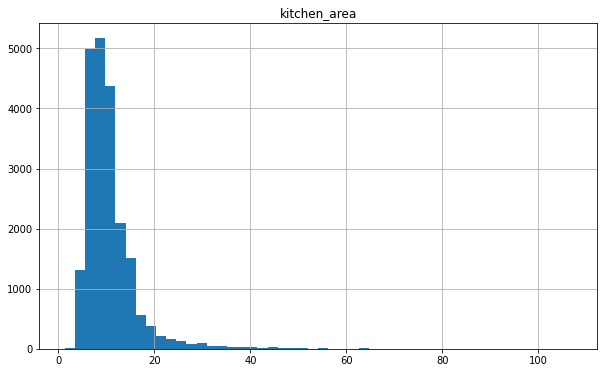

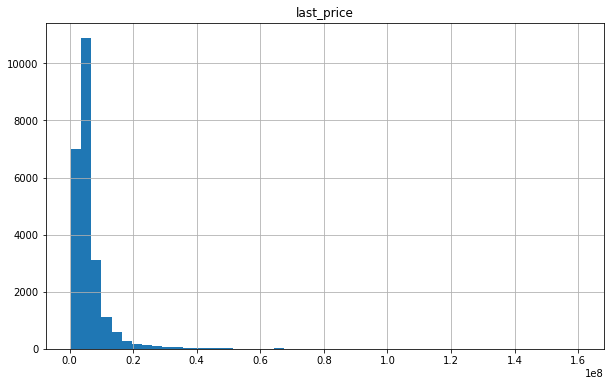

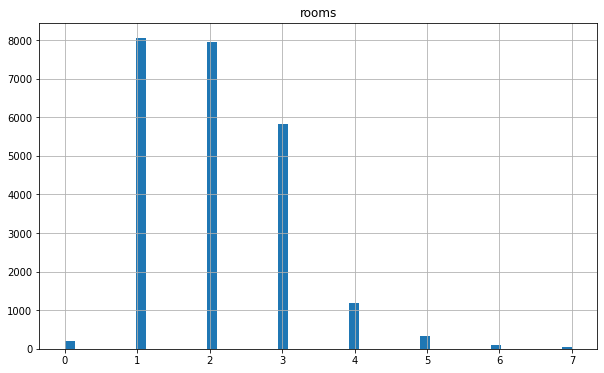

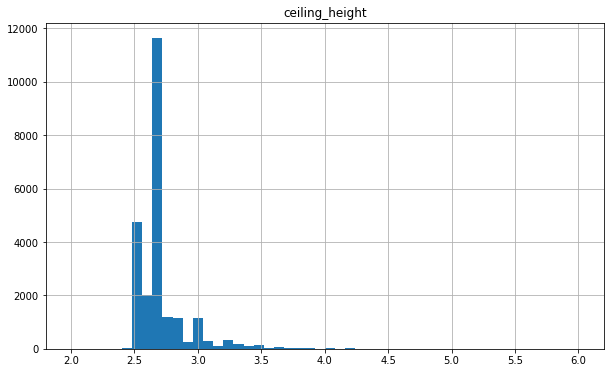

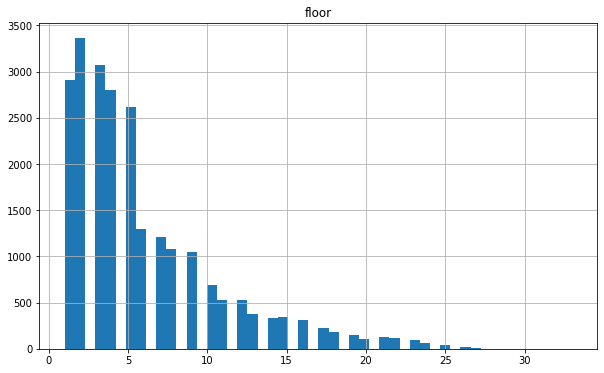

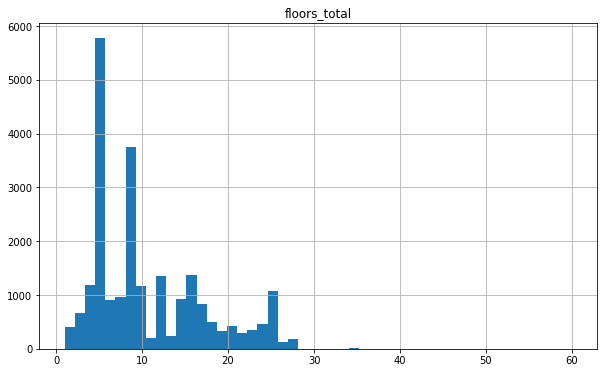

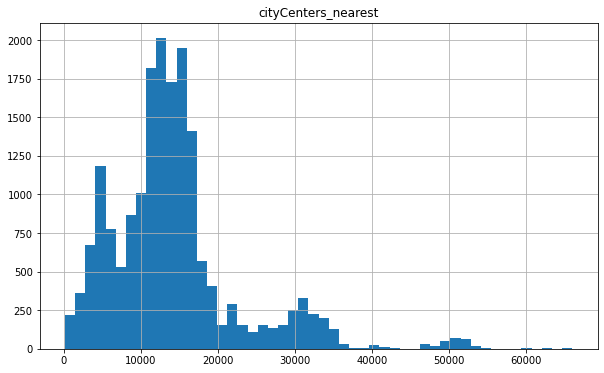

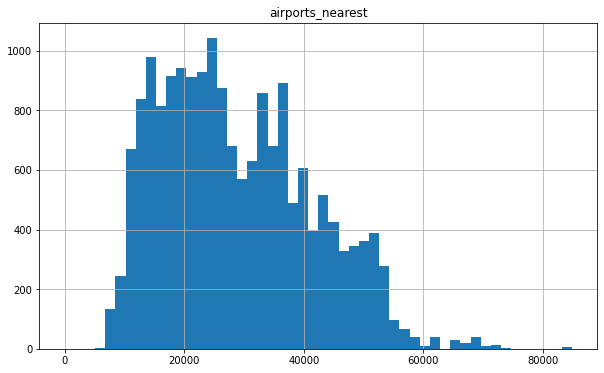

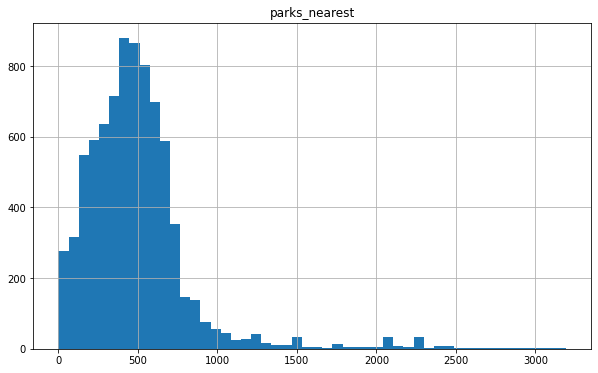

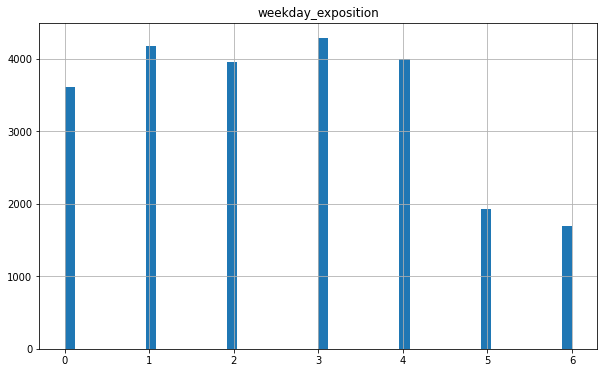

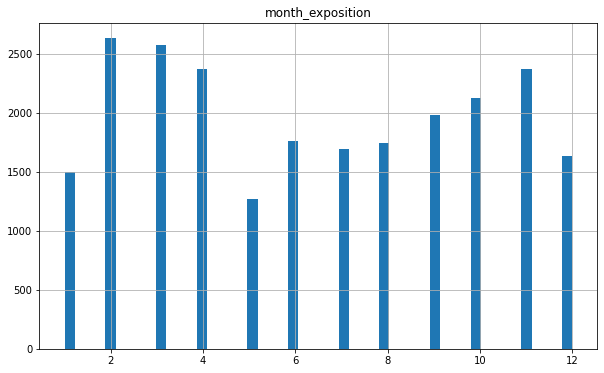

In [42]:
exploring_parameters = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 
                        'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest',
                        'weekday_exposition', 'month_exposition']

for parameter in exploring_parameters:
    data.hist(parameter, figsize=(10, 6), bins=50)
    plt.show()

In [43]:
# выведем описание данных
data[exploring_parameters].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday_exposition,month_exposition
count,"23,656.0","21,756.0","21,383.0","23,656.0","23,656.0","23,656.0","23,656.0","23,570.0","18,137.0","18,114.0","8,047.0","23,656.0","23,656.0"
mean,59.9,34.2,10.5,"6,347,414.0",2.1,2.7,5.9,10.7,"14,210.6","28,803.1",490.9,2.6,6.4
std,33.2,20.8,5.8,"7,504,515.7",1.0,0.2,4.9,6.6,"8,605.4","12,639.9",342.5,1.8,3.5
min,12.0,2.0,1.3,"430,000.0",0.0,2.0,1.0,1.0,181.0,0.0,1.0,0.0,1.0
25%,40.0,18.6,7.0,"3,400,000.0",1.0,2.6,2.0,5.0,"9,267.0","18,576.0",288.0,1.0,3.0
50%,52.0,30.0,9.1,"4,630,000.0",2.0,2.6,4.0,9.0,"13,114.0","26,752.0",455.0,3.0,6.0
75%,69.5,42.2,12.0,"6,750,000.0",3.0,2.7,8.0,16.0,"16,296.0","37,292.5",612.0,4.0,10.0
max,517.0,347.5,107.0,"160,000,000.0",7.0,6.0,33.0,60.0,"65,968.0","84,869.0","3,190.0",6.0,12.0


В столбце 'total_area' распределение значений напоминает распределение Пуассона, пик приходится на 40 кв.м. Минимальное значение 12, максимальное - 517 кв.м. Медиана - 52 кв.м., среднее арифметическое 60 кв.м., т.е. оно смещено вправо из-за очень больших квартир. Это соответствует действительности, в случае 12 кв.м. возможно продают комнату в квартире или очень маленькую студию.

В столбце 'living_area' распределение значений напоминает распределение Пуассона, пик приходится на 30 кв.м. Минимальное значение 2 кв.м., максимальное - 517 кв.м., медиана 26,7 м.кв, среднее арифметическое 28,8 м.кв.

В столбце 'kitchen_area' распределение значений напоминает распределение Пуассона, пик приходится на 30 кв.м. Минимальное значение 1.3, максимальное - 107 кв.м, медиана 9 м.кв, среднее арифметическое 10.5 м.кв.

В столбце 'last_price' распределение значений напоминает распределение Пуассона, пик приходится на 7 млн. руб. Минимальное значение 12 тыс. руб, максимальное - 160 млн. руб, медиана 4,6 млн. руб, среднее арифметическое 6,3 млн.руб.

Больше всего данных с однокомнатными и двухкомнатными квартирами (около 8000), затем идут трехкомнатные квартиры (около 6800), и дальше с ростом числа комнат число квартир монотонно убывает. Также есть около 200 квартир с 0 комнатами (возможно, это студии или комнаты вместо квартир).

В столбце 'ceiling_height' распределение значений напоминает распределение Пуассона, пик приходится на 2.7 м. Минимальное значение 2 м, максимальное - 6 м, медиана 2,65 м, среднее арифметическое 2,7 м.

В столбце 'floor' распределение значений напоминает распределение Пуассона, пик приходится на 2 этаж. Минимальное значение 1, максимальное - 33, медиана 4, среднее арифметическое 5,9.

В столбце 'floors_total' пик приходится на 5 этаж. Минимальное значение 1, максимальное - 60, медиана 9, среднее арифметическое 10,7.

В столбце 'cityCenters_nearest' пик приходится на 13 км. Минимальное значение 0,1 км, максимальное - 66 км, медиана 13,1 км, среднее арифметическое 14,2 км.

В столбце 'airports_nearest' распределение значений напоминает распределение Пуассона, пик приходится на 25 км. Минимальное значение 0 км, максимальное - 84,9 км, медиана 26,7 км, среднее арифметическое 28,8 км.

В столбце 'parks_nearest' распределение значений напоминает распределение Пуассона, пик приходится на 0,4 км. Минимальное значение 0 км, максимальное - 3,2 км, медиана 0,45 км, среднее арифметическое 0,5 км.

В столбце 'weekday_exposition' в будние дни объявлений выставляется больше (по 3,5 тыс- 4,2 тыс в день недели), в выходные меньше (по 1,8 тыс - 2 тыс в день недели)

В столбце 'month_exposition' с февраля по апрель и осенью объявлений выставляется больше (по 2 тыс- 2,7 тыс в месяц), в остальные месяцы меньше (по 1,3 тыс - 1,8 тыс в месяц). Это может быть связано, что в период отпусков с мая по август и в январские праздники люди реже занимаются продажей квартир.

Выведем число значений каждого типа этажа в столбце 'floor_type'

In [44]:
data.groupby('floor_type')['floor_type'].count()

floor_type
другой       17427
первый        2912
последний     3317
Name: floor_type, dtype: int64

В столбце 'floor_type' больше всего квартир на этажах, отличных от первого и последнего - 17,4 тыс, затем идут квартиры на последнем этаже - 3,3 тыс, и меньше всего квартир на первом этаже - 2,9 тыс.

#### Изучение скорости продажи квартир

Построим гистограмму данных в столбце 'days_exposition', выведем числовое описание данных в этом столбце

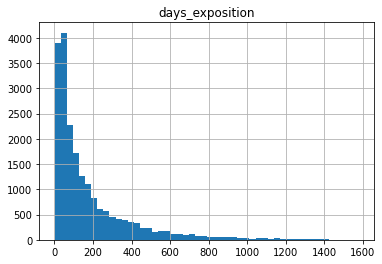

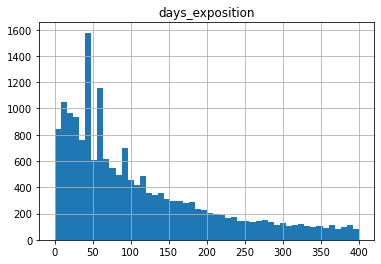

,days_exposition
count,"20,485.0"
mean,180.6
std,219.4
min,1.0
25%,45.0
50%,95.0
75%,231.0
max,"1,580.0"


In [45]:
data.hist('days_exposition', bins=50)
plt.show()
# рассмотрим подробнее гистаграмму для числа размещения до 400
data.hist('days_exposition', range=(0, 400), bins=50)
plt.show()

data.loc[:,['days_exposition']].describe()

<div style="border:solid green 2px; padding: 20px">
Обычно продажа квартиры проходит в 95-дневный срок. При этом среднее время продажи смещено и составляет 181 день, так как в данных присутствуют необычно долгие продажи вплоть до продолжительности в 4,3 года. Быстрыми можно считать продажи до первого квартиля - 45 дней (1,5 месяца). Медленными продажами можно считать продажи дольше значения третьего квартиля - 231 день (примерно 7,5 месяцев).
</div>

#### Изучение влияния на стоимость объекта

Построим матрицу корреляции и диаграмму рассеивания для оценки влияния параметров на стоимость объектов

In [46]:
price_factors = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 
                      'weekday_exposition', 'month_exposition', 'year_exposition']]
display(price_factors.corr())

,last_price,total_area,living_area,kitchen_area,rooms,weekday_exposition,month_exposition,year_exposition
last_price,1.0,0.7,0.7,0.6,0.4,-0.0,0.0,-0.1
total_area,0.7,1.0,0.9,0.6,0.8,-0.0,0.0,-0.1
living_area,0.7,0.9,1.0,0.4,0.8,-0.0,0.0,-0.1
kitchen_area,0.6,0.6,0.4,1.0,0.2,-0.0,0.0,-0.1
rooms,0.4,0.8,0.8,0.2,1.0,-0.0,-0.0,-0.1
weekday_exposition,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0
month_exposition,0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.3
year_exposition,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.3,1.0


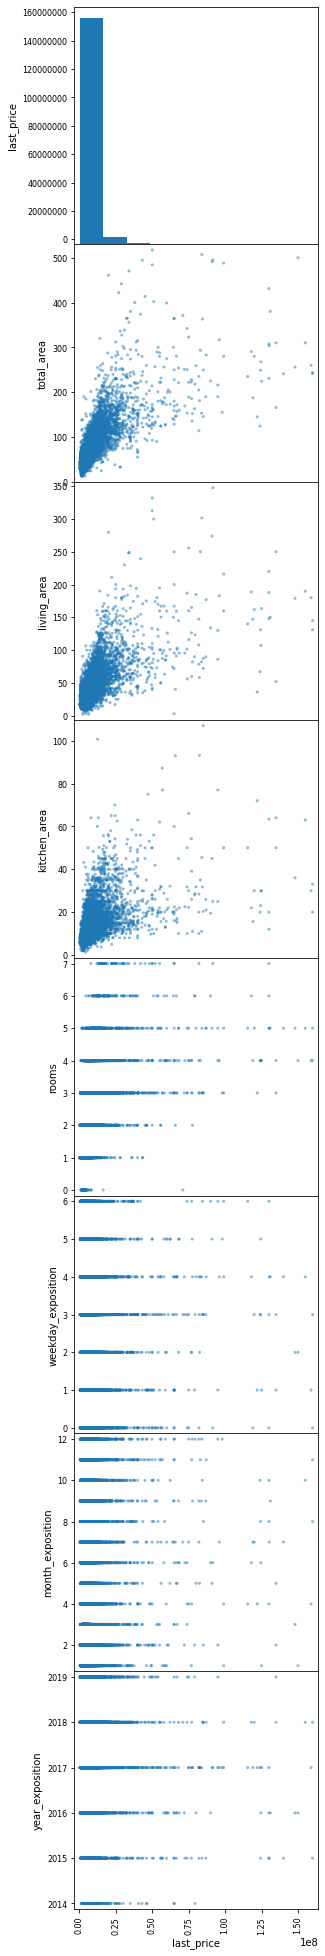

In [47]:
axes = pd.plotting.scatter_matrix(price_factors, figsize=(35, 35))

# оставим видимым только первый столбец диаграммы рассеивания
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if j > 0:
            axes[i,j].set_visible(False)

<div style="border:solid green 2px; padding: 20px">
По матрице корреляции и диаграмме рассеивания заметим, что наибольшее влияние на стоимость объекта оказывает общая площадь с коэффициентом корреляции 0,74: чем выше общая площадь, тем выше цена объекта. Жилая площадь, площадь кухни и число комнат также имеют высокую корреляцию со стоимостью объекта с коэффициентами 0,65; 0,56 и 0,43 соответственно. 

При этом общая площадь квартиры имеет высокую корреляцию с жилой площадью, площадью кухни и числом комнат с коэффициентами 0,94; 0,59 и 0,75 соответственно. Заметим, что высокая корреляция стоимости объекта с жилой площадью, площадью кухни и числом комнат обусловлена их высокой корреляцией с общей площадью объекта.
</div>

Матрица корреляции и диаграмма рассеивания не выявила высокой корреляции для таких дискретных величин, день недели, месяц, год размещения объявления. 

Построим графики зависимости стоимости объектов от параметров.

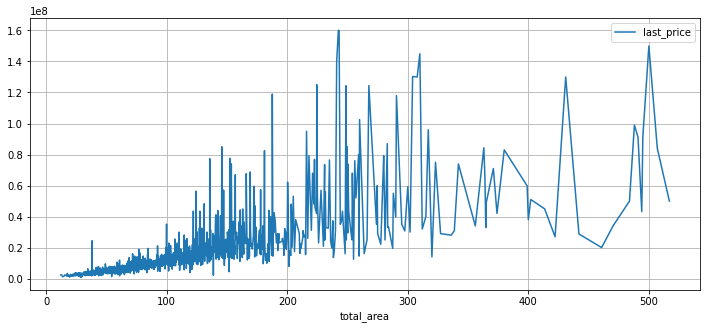

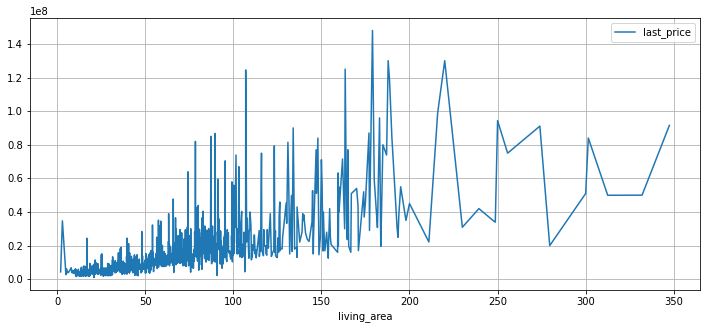

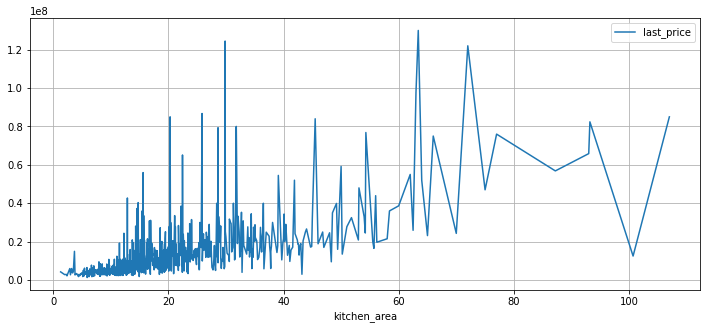

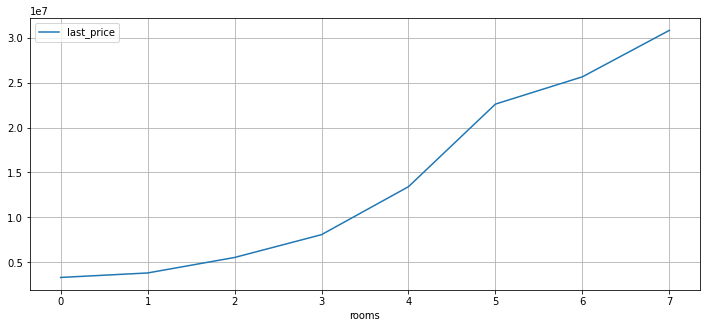

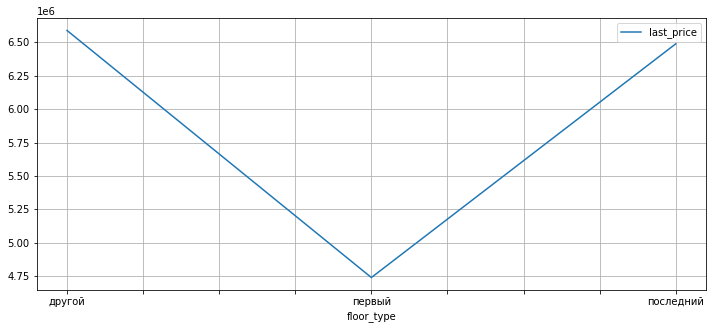

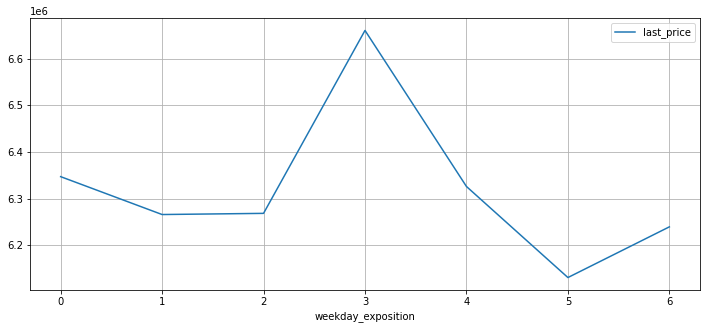

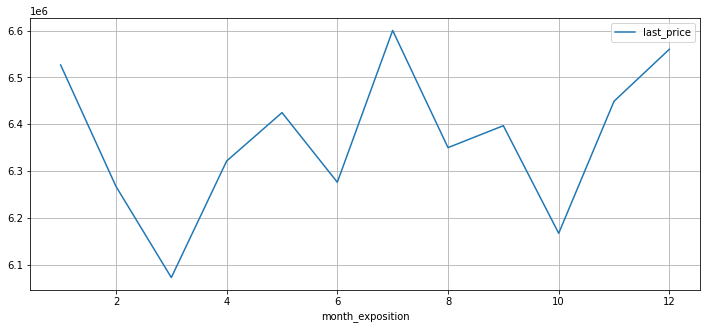

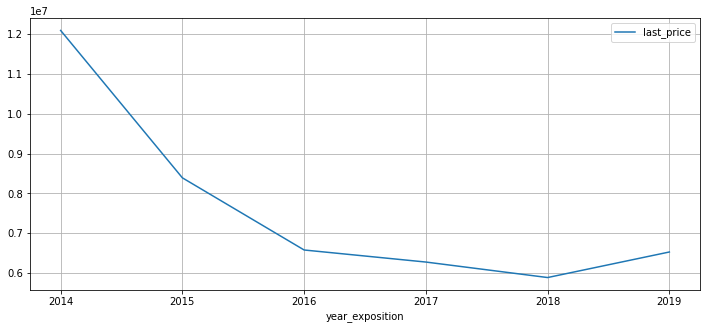

In [48]:
analysed_factors = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday_exposition', 
                    'month_exposition', 'year_exposition']
for factor in analysed_factors:
    data.pivot_table(index=factor, values='last_price').plot(grid=True, figsize=(12, 5))

<div style="border:solid green 2px; padding: 20px">
По графикам зависимостей стоимости объектов от общей площади, жилой площади и площади кухни видим восходящий тренд и высокий уровень корреляции этих параметров со стоимостью квартиры. 

По графику зависимости стоимости объектов от количества комнат заметим строгое возрастание цены с ростом числа комнат.

По графику зависимости стоимости объектов от типа этажа заметим, что среднее арифметическое квартир на первом этаже (4,75 млн руб) заметно меньше, чем последнем этаже (6,5 млн руб) и на других этажах (6,6 млн руб). 

По графику зависимости стоимости объектов от дня недели размещения объявления заметим, что средняя стоимость объектов несколько отличается в разные дни недели размещения квартиры (от 6,15 в субботу до 6,65 млн руб в четверг). В целом в выходные дни средняя стоимость квартир ниже. Выдвинем предположение, что это может быть обусловлено тем, что собственники более дешевых квартир выставляют объявления самостоятельно, и им удобнее это делать в выходные дни; в то время как более дорогие квартиры выставляют агентства недвижимости, и им это удобнее делать в течение рабочей недели.

По графику зависимости стоимости объектов от месяца размещения объявления заметим, что самые дорогие квартиры выставляются обычно в июле (в среднем 6,6 млн руб), и в январе и декабре (в среднем 6,55 млн руб), а самые недорогие квартиры в марте (в среднем 6,1 млн рублей). Это соотносится с наблюдениями, что летом в период отпусков и в январе и декабре меньше всего выставляется объявлений на продажу квартиры, поэтому цена в это время на квартиры выше.

По графику зависимости стоимости объектов от года размещения объявления заметим, что был строго низходящий тренд стоимости с 2014 года (в среднем 12 млн рублей) до 2018 года (в среднем 6 млн рублей) и затем в 2019 году средняя стоимость квартир немного выросла до 6,5 млн руб. Выдвинем предположение, что это связано с тем, что после обвала курса рубля в 2014 году покупательская способность рубля резко упала, и поэтому люди стали покупать более недорогое жилье.
</div>

#### Исследование средней цены квадратного метра

Вычислим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [49]:
# Вычислим среднюю цену одного квадратного метра в населенных пунктах
price_per_meter2_per_localcities = data.groupby('locality_name')['price_per_meter2'].agg(['count', 'mean'])
# Выведем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
display(price_per_meter2_per_localcities.sort_values(by='count', ascending=False).head(10))

,count,mean
locality_name,,
Санкт-Петербург,15679,"114,251.3"
поселок Мурино,556,"85,681.8"
поселок Шушары,440,"78,677.4"
Всеволожск,398,"68,654.5"
Пушкин,369,"103,125.8"
Колпино,337,"75,333.3"
поселок Парголово,327,"90,175.9"
Гатчина,307,"68,746.1"
деревня Кудрово,299,"92,473.5"


За период с 2014 по 2019 гг среди 10 населённых пунктах с наибольшим числом объявлений населенный пункт с самой **высокой стоимостью квадратного метра** - Санкт-Петербург , его средняя стоимость квадратного метра: 114 тыс рублей,
а населенный пункт с самой **низкой стоимостью квадратного метра** - Выборг , его средняя стоимость квадратного метра: 58 тыс рублей. 

#### Исследование влияния расстояния

Для квартир в Санкт-Петербурге выведем среднюю стоимость квадратного метра в зависимости от расстояния до центра города в километрах и график по этим значениям.

                         price_per_meter2
cityCenters_distance_km                  
0.0                             245,833.5
1.0                             161,806.0
2.0                             155,820.1
3.0                             121,179.2
4.0                             130,235.0
5.0                             138,891.5
6.0                             149,140.1
7.0                             156,176.9
8.0                             125,097.7
9.0                             113,322.0
10.0                            112,906.3
11.0                            108,630.8
12.0                            107,503.1
13.0                            108,148.1
14.0                            104,252.4
15.0                            104,232.0
16.0                            100,542.6
17.0                             96,564.8
18.0                             96,362.3
19.0                             98,652.7
20.0                            103,045.2
21.0                             9

<AxesSubplot:xlabel='cityCenters_distance_km'>

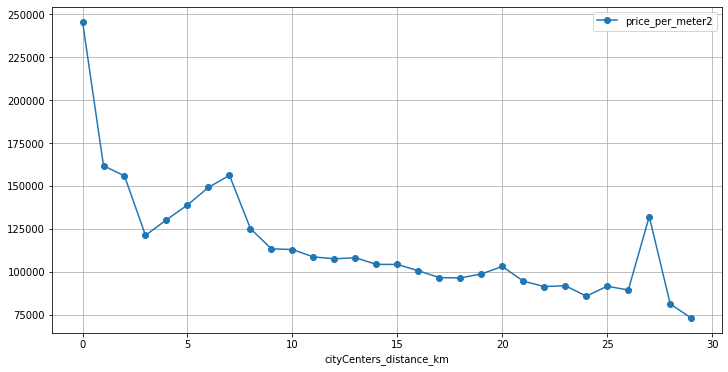

In [50]:
price_per_distance = data\
    .query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='cityCenters_distance_km', values='price_per_meter2')

print(price_per_distance)

price_per_distance.plot(style='o-', grid=True, figsize=(12, 6))

<div style="border:solid green 2px; padding: 20px">
По графику видно, что средняя стоимость квадратного метра в Санкт-Петербурге имеет тренд к уменьшению с увеличением расстояния до центра города с 246 тыс рублей в центре города до 73 тыс руб на 28 км от центра города.
</div>

### Общий вывод

<div style="border:solid green 2px; padding: 20px">
Наибольшее влияние на стоимость квартиры оказывает **общая площадь** с коэффициентом корреляции 0,74: чем выше общая площадь, тем выше цена объекта. **Жилая площадь**, **площадь кухни** и **число комнат** также имеют высокую корреляцию со стоимостью объекта с коэффициентами 0,65; 0,56 и 0,43 соответственно. Заметим, что высокая корреляция стоимости объекта с жилой площадью, площадью кухни и числом комнат обусловлена их высокой корреляцией с общей площадью объекта (коэффициентs коррелляции 0,94; 0,59 и 0,75 соответственно).

По **типу этажа** заметим, что среднее арифметическое квартир на первом этаже (4,75 млн руб) заметно меньше, чем последнем этаже (6,5 млн руб) и на других этажах (6,6 млн руб). 

По **дню недели размещения объявления** заметим, что в выходные дни средняя стоимость квартир ниже. Выдвинем предположение, что это может быть обусловлено тем, что собственники более дешевых квартир выставляют объявления самостоятельно, и им удобнее это делать в выходные дни; в то время как более дорогие квартиры выставляют агентства недвижимости, и им это удобнее делать в течение рабочей недели.

По **месяцу размещения объявления** заметим, что самые дорогие квартиры выставляются обычно в июле (в среднем 6,6 млн руб), и в январе и декабре (в среднем 6,55 млн руб), а самые недорогие квартиры в марте (в среднем 6,1 млн рублей). Это соотносится с наблюдениями, что летом в период отпусков и в январе и декабре меньше всего выставляется объявлений на продажу квартиры, поэтому цена в это время на квартиры выше.

По **году размещения объявления** заметим, что был строго низходящий тренд стоимости с 2014 года (в среднем 12 млн рублей) до 2018 года (в среднем 6 млн рублей) и затем в 2019 году средняя стоимость квартир немного выросла до 6,5 млн руб. Выдвинем предположение, что это связано с тем, что после обвала курса рубля в 2014 году покупательская способность рубля резко упала, и поэтому люди стали покупать более недорогое жилье.

Обычно продажа квартиры проходит в 95-дневный срок. При этом среднее **время продажи** смещено и составляет 181 день, так как в данных присутствуют необычно долгие продажи вплоть до продолжительности в 4,3 года. Быстрыми можно считать продажи до первого квартиля - 45 дней (1,5 месяца). Медленными продажами можно считать продажи дольше значения третьего квартиля - 231 день (примерно 7,5 месяцев).

За период с 2014 по 2019 гг среди 10 населённых пунктах с наибольшим числом объявлений населенный пункт с самой **высокой стоимостью квадратного метра** - Санкт-Петербург , его средняя стоимость квадратного метра: 114 тыс рублей,
а населенный пункт с самой **низкой стоимостью квадратного метра** - Выборг , его средняя стоимость квадратного метра: 58 тыс рублей. 

Средняя стоимость квадратного метра в Санкт-Петербурге имеет тренд к уменьшению с увеличением **расстояния до центра города** с 246 тыс рублей в центре города до 73 тыс руб на 28 км от центра города.
</div>